In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *

F_geo = lambda x,p: np.floor(np.log(1-x)/np.log(1-p))
f = lambda x,p: p* (1-p)**(x-1)
Trans = lambda x: 10**(-0.2*x/10)
def h(p_list):
    y_list = np.zeros(len(p_list))
    for i,p in enumerate(p_list):
        if p<1e-6 or (1-p)<1e-6:
            y_list[i]= 0
        else:
            y_list[i]= -p*np.log2(p)-(1-p)*np.log2(1-p)
    return y_list

# One repeater

## fixed distance, repeater location sweeping

In [9]:
def T_avg_parallel(L1,L2,Nmax=100):
    τ1 = L1/c
    τ2 = L2/c
    p1 = Trans(L1)
    p2 = Trans(L2)
    T_tot = τ1
    T_memory = 0
    Nvals = np.arange(1,Nmax)
    for i1 in range(1,Nmax):
        T_tot += np.sum(f(i1,p1)*f(Nvals,p2)*np.max(np.array([(2*i1-1)*τ1*np.ones(Nmax-1),2*Nvals*τ2]),axis=0))
    return T_tot, T_memory

def T_avg_mc(L1,L2,Nmax=10000):
    τ1 = L1/c
    τ2 = L2/c
    p1 = p_link*Trans(L1)
    p2 = p_link*Trans(L2)
    N1 = F_geo(np.random.rand(Nmax),p1)
    N2 = F_geo(np.random.rand(Nmax),p2)
    Ts = np.max(np.array([(2*N1-1)*τ1,2*N2*τ2]),axis=0)
    T_tot = τ1 + np.mean(Ts)
#     T_memory = 4*T_tot-(4/p1-1)*τ1-(4/p2-3)*τ2
#     T_memory_qkd = 2*T_tot-(2/p1+1)*τ1-(2/p2-2)*τ2
    f_memory = np.mean(np.exp(-(4*Ts-(4*N1-5)*τ1-(4*N2-3)*τ2)/τ_coh))
    f_memory_qkd = np.mean(np.exp(-(2*Ts-(2*N1-1)*τ1-(2*N2-2)*τ2)/τ_coh))
    return T_tot, f_memory, f_memory_qkd

def T_avg(L1,L2,Nmax=100):
    τ1 = L1/c
    τ2 = L2/c
    p1 = Trans(L1)
    p2 = Trans(L2)
    T_tot = τ1
    T_memory = 0
    for i1 in range(1,Nmax):
        for i2 in range(1,Nmax):
            T_tot += f(i1,p1)*f(i2,p2)*np.max([(2*i1-1)*τ1, 2*i2*τ2])
#             if (2*i1-1)*τ1> 2*i2*τ2:
#                 T_tot += f(i1,p1)*f(i2,p2)*(2*i1-1)*τ1
#                 T_memory += f(i1,p1)*f(i2,p2)*(4*(2*i1-1)*τ1-(4*i1-3)*τ1-(4*i2-3)*τ2)
#             else:
#                 T_tot += f(i1,p1)*f(i2,p2)*2*i2*τ2
#                 T_memory += f(i1,p1)*f(i2,p2)*(8*i2*τ2-(4*i1-3)*τ1-(4*i2-3)*τ2)
    return T_tot, T_memory


In [347]:
L0 = 200 # e2e distance [km]
c = 2e5 # speed of light [km/s]
τ_coh = 0.1

δ = 0.3
rep_loc = np.linspace(δ,1-δ,20)
inv_rate_par = np.zeros(len(rep_loc))
f_memory_par = np.zeros(len(rep_loc))
# inv_rate_mc = np.zeros(len(rep_loc))
# inv_rate_old = np.zeros(len(rep_loc))
# memory_time_old = np.zeros(len(rep_loc))
inv_rate_seq = np.zeros(len(rep_loc))
f_memory_seq = np.zeros(len(rep_loc))
for i, pos in enumerate(rep_loc):
    L1 = pos*L0
    L2 = L0 - L1
#     inv_rate_par[i], memory_time_par[i] = T_avg_parallel(L1,L2,Nmax=10000)
    inv_rate_par[i], f_memory_par[i], _ = T_avg_mc(L1,L2,Nmax=100000)
#     inv_rate_old[i], memory_time_old[i] = T_avg(L1,L2)
    inv_rate_seq[i] = 2*L1/(c*Trans(L1))+2*L2/(c*Trans(L2))
#     memory_time_seq[i] = 3*L0/c + 4*L1/(c*Trans(L1))+ 4*L2/(c*Trans(L2))
#     memory_time_seq[i] = 2*(1/Trans(L2)+1)*L2/c
        

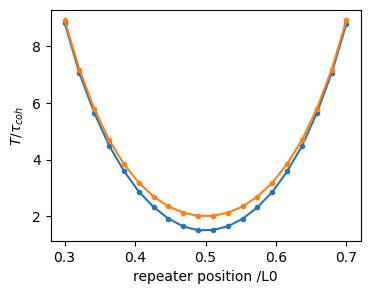

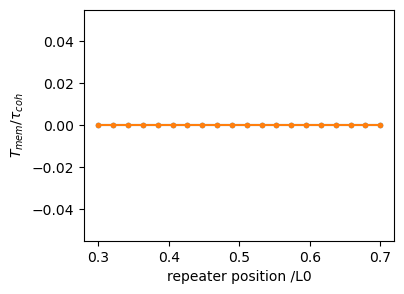

In [348]:
plt.figure(figsize=(4,3))
# plt.plot(rep_loc,inv_rate_par/τ_coh,".-")
plt.plot(rep_loc,inv_rate_par/τ_coh,".-")
plt.plot(rep_loc,inv_rate_seq/τ_coh,".-")
plt.xlabel("repeater position /L0")
plt.ylabel(r"$T/τ_{coh}$")
plt.show()

# # plt.subplot(2,1,2)
plt.figure(figsize=(4,3))
plt.plot(rep_loc,memory_time_par/τ_coh,".-")
plt.plot(rep_loc,memory_time_seq/τ_coh,".-")
plt.xlabel("repeater position /L0")
plt.ylabel(r"$T_{mem}/τ_{coh}$")
plt.show()



## rate vs. distance

In [16]:
c = 2e5 # speed of light [km/s]
τ_coh = 0.1
p_link= 1

L0_list = np.linspace(100,200,101) # e2e distance [km]
inv_rate_par = np.zeros(len(L0_list))
f_memory_par = np.zeros(len(L0_list))
f_memory_qkd_par = np.zeros(len(L0_list))
inv_rate_seq = np.zeros(len(L0_list))
f_memory_seq = np.zeros(len(L0_list))
f_memory_qkd_seq = np.zeros(len(L0_list))
for i, L0 in enumerate(L0_list):
    L1 = L0/2
    L2 = L0/2
#     inv_rate_par[i], memory_time_par[i] = T_avg_mc(L1,L2,Nmax=10000)
    inv_rate_par[i], f_memory_par[i], f_memory_qkd_par[i] = T_avg_mc(L1,L2,Nmax=100000)
    inv_rate_seq[i] = 2*L1/(c* p_link*Trans(L1))+2*L2/(c* p_link*Trans(L2))
    f_memory_seq[i] = np.exp(-3*L0/c/τ_coh) *p_link*Trans(L2)*np.exp(-4*L2/(c*τ_coh))/(1- (1-p_link*Trans(L2))*np.exp(-4*L2/(c*τ_coh)) )
    f_memory_qkd_seq[i] = p_link*Trans(L2)*np.exp(-4*L2/(c*τ_coh))/(1- (1-p_link*Trans(L2))*np.exp(-2*L2/(c*τ_coh)) )

    
print("L0_list ",len(L0_list),L0_list)
print("f_memory_qkd_seq ",len(f_memory_qkd_seq),f_memory_qkd_seq)

L0_list  101 [100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197.
 198. 199. 200.]
f_memory_qkd_seq  101 [0.94751794 0.94595561 0.94435239 0.9427074  0.94101976 0.93928856
 0.9375129  0.93569187 0.93382455 0.93191001 0.92994731 0.92793553
 0.92587371 0.92376093 0.92159622 0.91937864 0.91710724 0.91478107
 0.91239919 0.90996065 0.9074645  0.90490982 0.90229568 0.89962114
 0.8968853  0.89408725 0.8912261  0.88830097 0.885311   0.88225533
 0.87913314 0.87594362 0.87268598 0.86935945 0.86596329 0.8624968
 0.85895927 0.85535007 0.85166856 0.84791417 0.844

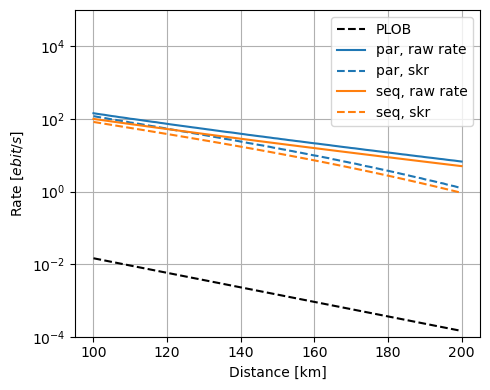

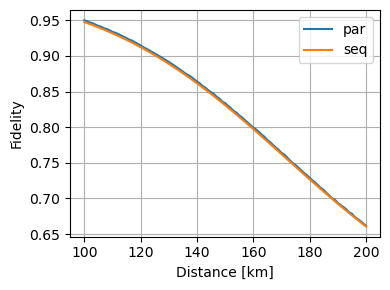

In [15]:
f_qkd_par = 0.5-0.5*f_memory_qkd_par#np.exp(-memory_time_qkd_par/τ_coh)
f_qkd_seq = 0.5-0.5*f_memory_qkd_seq#np.exp(-memory_time_qkd_seq/τ_coh)
plt.figure(figsize=(5,4))
plt.plot(L0_list,-np.log2(1-Trans(L0_list)),"k--", label="PLOB")
plt.plot(L0_list,1/inv_rate_par,"-",color="C0", label="par, raw rate")
plt.plot(L0_list,(1-h(f_qkd_par))/inv_rate_par,"--",color="C0", label="par, skr")
plt.plot(L0_list,1/inv_rate_seq,"-",color="C1", label="seq, raw rate")
plt.plot(L0_list,(1-h(f_qkd_seq))/inv_rate_seq,"--",color="C1", label="seq, skr")
plt.yscale("log")
plt.xlabel("Distance [km]")
plt.ylabel(r"Rate $[ebit/s]$")
plt.ylim([1e-4,1e5])
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig("figures_realtime/one_repeater_no_cutoff.pdf")
plt.show()


f_par = 0.5-0.5*f_memory_par#np.exp(-memory_time_par/τ_coh)
f_seq = 0.5-0.5*f_memory_seq#np.exp(-memory_time_seq/τ_coh)
plt.figure(figsize=(4,3))
plt.plot(L0_list,1-f_par,"-", label="par")
plt.plot(L0_list,1-f_seq,"-", label="seq")
# plt.yscale("log")
plt.xlabel("Distance [km]")
# plt.ylabel(r"$T_{mem}/τ_{coh}$")
plt.ylabel("Fidelity")
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig("figures_realtime/one_repeater_fidelity_no_cutoff.pdf")
plt.show()


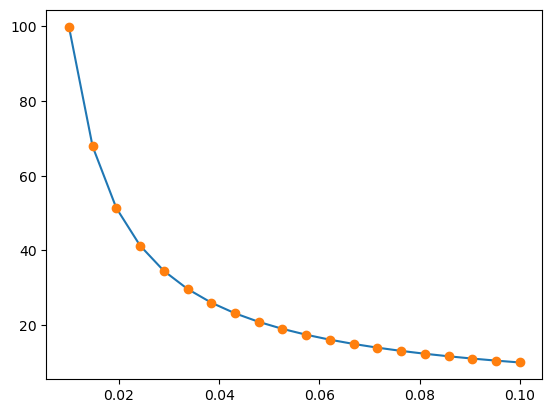

In [83]:
p_list = np.linspace(0.01,0.1,20)
Nmax = 1000
N_avg = np.zeros(len(p_list))
for i, p in enumerate(p_list):
    for i1 in range(1,Nmax):
        N_avg[i] += i1*f(i1,p)
        
plt.plot(p_list,1/p_list)
plt.plot(p_list,N_avg,"o")
plt.show()

## n repeaters

In [18]:
def T_avg_mc_n_rep(links,Nmax=10000):
    N_links = len(links)
    τs = links/c
    Ns = np.zeros((N_links,Nmax))
    Ns[0,:] = (2*F_geo(np.random.rand(Nmax),p_link*Trans(links[0]))-1)*τs[0]
    for i in range(1,N_links):
        Ns[i,:] = 2*F_geo(np.random.rand(Nmax),p_link*Trans(links[i]))*τs[i]
    T_tot = τs[0] + np.mean(np.max(Ns,axis=0))
    
    Ts = np.zeros((N_links-1,Nmax))
    Ts[0,:] = np.abs(Ns[1,:]-Ns[0,:])+ 2*τs[1]
    for i in range(1,N_links-1):
        Ts[i,:] = np.abs(Ns[i+1,:]-Ns[i,:]+τs[i])+ 2*τs[i+1]
#     T_memory = 4*T_tot-(4/p1-3)*τ1-(4/p2-3)*τ2
#     T_memory_qkd = 2*T_tot-(2/p1-1)*τ1-(2/p2-2)*τ2

    Ts_A = np.max(Ns,axis=0)-Ns[0,:] + τs[0] #np.zeros((1,Nmax))
    Ts_B = np.max(Ns,axis=0)-Ns[-1,:] + τs[-1] #np.zeros((1,Nmax))
    
    f_memory = np.mean(np.exp(-(np.sum(Ts,axis=0)+Ts_A+Ts_B)/τ_coh))
    f_memory_qkd = np.mean(np.exp(-np.sum(Ts,axis=0)/τ_coh))

    return T_tot, f_memory, f_memory_qkd


In [19]:
c = 2e5 # speed of light [km/s]
τ_coh = 0.1
p_link= 0.05
n = 8

L0_list = np.linspace(10,400,101) # e2e distance [km]
inv_rate_par_2 = np.zeros(len(L0_list))
f_memory_par_2 = np.zeros(len(L0_list))
f_memory_qkd_par_2 = np.zeros(len(L0_list))
inv_rate_seq_2 = np.zeros(len(L0_list))
f_memory_seq_2 = np.zeros(len(L0_list))
f_memory_qkd_seq_2 = np.zeros(len(L0_list))
for i, L0 in enumerate(L0_list):
#     L1 = L0/2
#     L2 = L0/2
    Ls = np.array([L0/n]*n)
#     inv_rate_par[i], memory_time_par[i], memory_time_qkd_par[i] = T_avg_mc(L1,L2,Nmax=100000)
    inv_rate_par_2[i],f_memory_par_2[i],f_memory_qkd_par_2[i] = T_avg_mc_n_rep(Ls,Nmax=100000)
    inv_rate_seq_2[i] = np.sum(2*Ls/(c* p_link*Trans(Ls)))
#     memory_time_seq_2[i] = 3*L0/c + 4*np.sum(2*Ls[1:]/(c* p_link*Trans(Ls[1:])))
#     memory_time_qkd_seq[i] = 2*(1/(p_link*Trans(L2))+1)*L2/c
    f_memory_seq_2[i] = np.exp(-3*L0/c/τ_coh) *np.prod(p_link*Trans(Ls[1:])*np.exp(-4*Ls[1:]/(c*τ_coh))/(1- (1-p_link*Trans(Ls[1:]))*np.exp(-4*Ls[1:]/(c*τ_coh)) ) )
    f_memory_qkd_seq_2[i] = np.prod( p_link*Trans(Ls[1:])*np.exp(-4*Ls[1:]/(c*τ_coh))/(1- (1-p_link*Trans(Ls[1:]))*np.exp(-2*Ls[1:]/(c*τ_coh)) )  )


In [21]:
print("f_memory_qkd_seq_2",f_memory_qkd_seq_2)

f_memory_qkd_seq_2 [0.98079816 0.97285483 0.96465229 0.95618821 0.94746061 0.93846782
 0.92920857 0.91968194 0.90988742 0.89982496 0.88949494 0.87889823
 0.86803618 0.85691069 0.84552418 0.83387965 0.82198069 0.80983147
 0.79743679 0.78480209 0.77193346 0.75883764 0.74552204 0.73199476
 0.71826458 0.70434095 0.69023401 0.67595458 0.66151415 0.64692486
 0.63219951 0.61735151 0.60239489 0.58734422 0.57221466 0.55702184
 0.54178189 0.52651134 0.51122713 0.4959465  0.480687   0.46546635
 0.45030246 0.43521332 0.42021694 0.4053313  0.39057424 0.37596342
 0.36151625 0.3472498  0.3331807  0.31932514 0.30569872 0.29231646
 0.27919264 0.26634082 0.25377374 0.24150324 0.22954029 0.21789485
 0.20657589 0.19559133 0.18494803 0.17465175 0.16470716 0.1551178
 0.14588613 0.13701347 0.12850008 0.12034514 0.1125468  0.1051022
 0.09800754 0.09125807 0.0848482  0.07877153 0.0730209  0.06758847
 0.06246577 0.05764381 0.05311307 0.04886364 0.04488526 0.0411674
 0.0376993  0.03447007 0.03146873 0.02868427 0

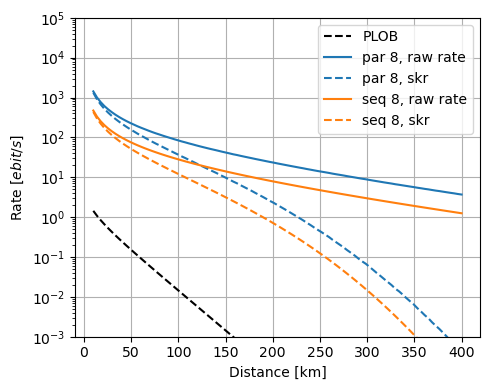

In [20]:
f_qkd_par_2 = 0.5-0.5*f_memory_qkd_par_2#np.exp(-memory_time_qkd_par/τ_coh)
f_qkd_seq_2 = 0.5-0.5*f_memory_qkd_seq_2#np.exp(-memory_time_qkd_seq/τ_coh)
plt.figure(figsize=(5,4))
plt.plot(L0_list,-np.log2(1-Trans(L0_list)),"k--", label="PLOB")
plt.plot(L0_list,1/inv_rate_par_2,"-",color="C0", label="par %d, raw rate" % n)
# plt.plot(L0_list,1/inv_rate_par,"-",color="C1", label="par, raw rate")
plt.plot(L0_list,(1-h(f_qkd_par_2))/inv_rate_par_2,"--",color="C0", label="par %d, skr" % n)
# plt.plot(L0_list,(1-h(f_qkd_par))/inv_rate_par,"--",color="C1", label="par, skr")
plt.plot(L0_list,1/inv_rate_seq_2,"-",color="C1", label="seq %d, raw rate" % n)
plt.plot(L0_list,(1-h(f_qkd_seq_2))/inv_rate_seq_2,"--",color="C1", label="seq %d, skr" % n)
plt.yscale("log")
plt.xlabel("Distance [km]")
plt.ylabel(r"Rate $[ebit/s]$")
plt.ylim([1e-3,1e5])
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig("figures_realtime/one_repeater_no_cutoff.pdf")
plt.show()


# f_par_2 = 0.5-0.5*f_memory_par_2#np.exp(-memory_time_par/τ_coh)
# # f_seq = 0.5-0.5*f_memory_seq#np.exp(-memory_time_seq/τ_coh)
# plt.figure(figsize=(4,3))
# plt.plot(L0_list,1-f_par_2,"-", label="par")
# plt.plot(L0_list,1-f_par,"-", label="par %d" % n)
# # plt.plot(L0_list,1-f_seq,"-", label="seq")
# # plt.yscale("log")
# plt.xlabel("Distance [km]")
# # plt.ylabel(r"$T_{mem}/τ_{coh}$")
# plt.ylabel("Fidelity")
# plt.grid()
# plt.legend()
# plt.tight_layout()
# # plt.savefig("figures_realtime/one_repeater_fidelity_no_cutoff.pdf")
# plt.show()
